<font size = 5.5> **Problem Statement**

<font size = 4.5> An ecommerce company has prepared a dataset containing shopping details of their customers, which includes CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100). The company is unable to target a specific set of customers with a particular set of SKUs(Stock keeping units)

<font size = 4.5>Segment customers into different groups based on their shopping trends

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\user\\Desktop\\shopping_data.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Display basic information and statistical summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Genre' column
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = data[["Genre",'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



In [13]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Agg_Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


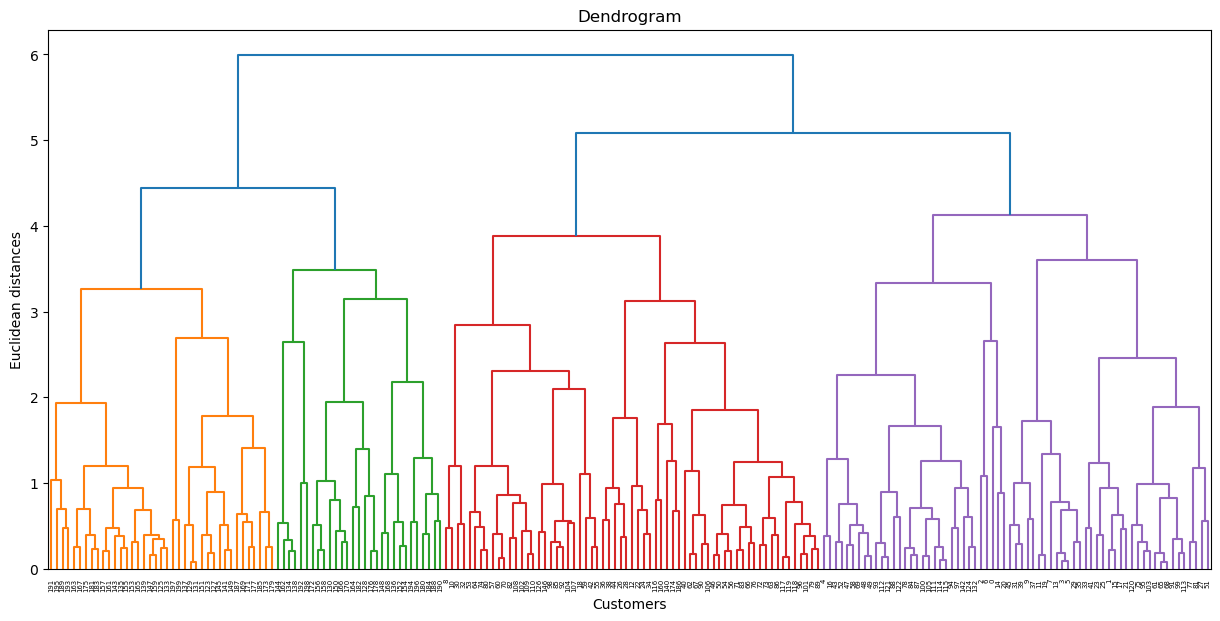

In [9]:
# Visualize the Dendrogram to show the hierarchical clustering
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='complete'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Based on Different colours shown in the dendrogram -- Coustomers are divided in
####"FOUR different clusters"

<font size = 5.5>Deciding the Optimal Number of Clusters

### Dendrogram Analysis

A dendrogram is a tree-like diagram that records the sequences of merges or splits. To decide the optimal number of clusters:

- Plot the dendrogram.
- Look for the longest vertical distance that doesn't cross any horizontal line (also known as the largest gap between two successive merges).
- The optimal number of clusters corresponds to the number of vertical lines that intersect a horizontal line drawn through this longest vertical distance.

In [10]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
agg_clusters = agg_cluster.fit_predict(scaled_features)

# Add the Agglomerative Clustering labels to the dataset
data['Agg_Cluster'] = agg_clusters

**Visualizing the clusters using features of the dataset**

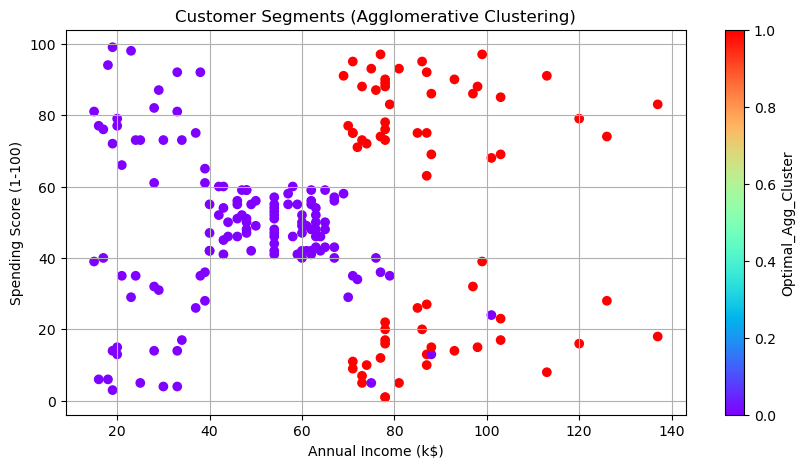

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Agg_Cluster'], cmap='rainbow', marker='o')
plt.title('Customer Segments (Agglomerative Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Optimal_Agg_Cluster')
plt.grid(True)
plt.show()

<font size = 6> **Conclusion** -- No effect of "Including column -- <br><br>'Genre' of the DataSet" 